In [27]:
from kmeans import kmeans as my_KMeans
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

In [13]:
#Let's get this data
df = pd.read_csv("../datasets/historical-weather.csv")
df.head(3)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4


In [14]:
df.head(3)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4


In [15]:
df.drop(['rowID', 'hpwren_timestamp'], axis=1, inplace=True)

In [16]:
for x in df:
    df[x].fillna(df[x].median(), inplace=True)



In [29]:
scaler = StandardScaler() 
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [30]:
pca = PCA(n_components = 2) 
df_pca = pca.fit_transform(df_scaled) 
df_pca = pd.DataFrame(df_pca) 
df_pca.columns = ['P1', 'P2'] 

In [17]:
start = time.time()

k = KMeans(n_clusters=8, tol=0, max_iter=100)
output = k.fit(np.array(df))

end = time.time()

elapsed = end - start
elapsed

0.35372424125671387

In [18]:
print(k.labels_)

[0 0 5 ... 2 5 2]


In [19]:
my_start = time.time()

my_k = my_KMeans(k=8)
my_output = my_k.fit(np.array(df))

my_end = time.time()

my_elapsed = my_end - my_start
my_elapsed

133.37794613838196

In [ ]:
ratio = my_elapsed / elapsed

print("My algorithm is {} times slower than the built in one :P".format(np.round(ratio, decimals=2)))

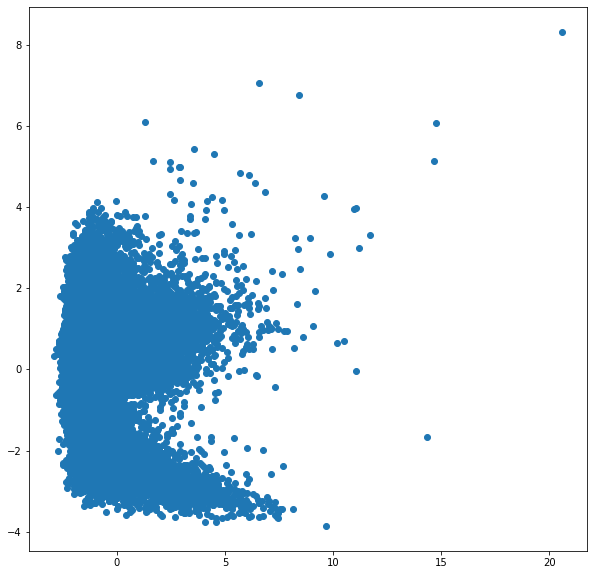

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['P1'], df_pca['P2'], c=k.labels_)

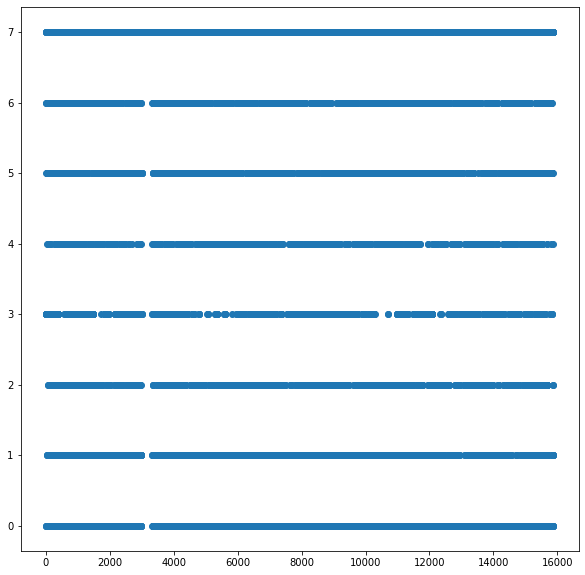

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(my_output[0])), my_output[0])